In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('result.csv')

In [3]:
ohlc_data = [row[['open', 'high', 'low', 'close']].values for _, row in df.iterrows()]

In [4]:
start, end = 1, (len(df) // 6)

In [5]:
def boxplot(df, start, end):
    plt.figure(figsize=(12, 6))
    plt.boxplot(ohlc_data, patch_artist=True)
    plt.title('OHLC Box Plot for Each Row')
    plt.xlabel('Time (Row Index)')
    plt.ylabel('Price')
    plt.xticks(range(1, len(df) + 1), range(1, len(df) + 1), rotation=90)  # 行番号をX軸ラベルに
    plt.xlim(start, end)
    plt.tight_layout()
    plt.show()

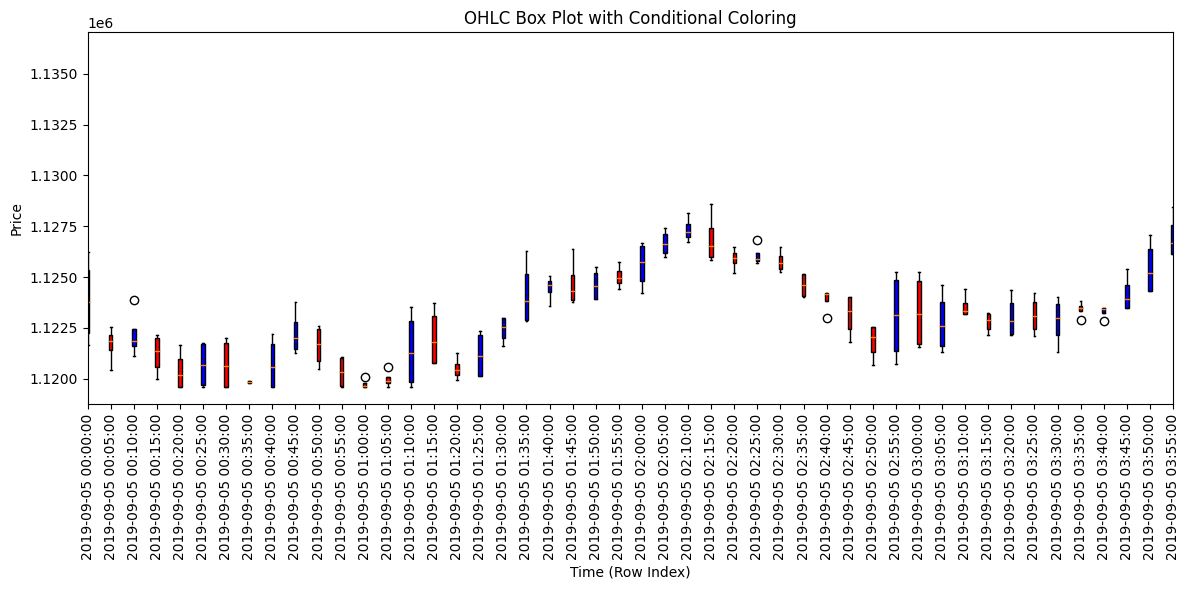

In [6]:
# グラフを作成
plt.figure(figsize=(12, 6))
plt.title('OHLC Box Plot with Conditional Coloring')
plt.xlabel('Time (Row Index)')
plt.ylabel('Price')

# 各行に対して、CloseがOpenより高い場合は青色、低い場合は赤色に設定
positions = []  # 各箱ひげ図の位置を保存
for i, row in df.iterrows():
    ohlc_values = row[['open', 'high', 'low', 'close']].values  # 各行のOHLC値を取得
    color = 'blue' if row['close'] > row['open'] else 'red'  # 色を決定
    pos = i + 1
    plt.boxplot(ohlc_values, positions=[pos], patch_artist=True, 
                boxprops=dict(facecolor=color))
    positions.append(pos)  

# X軸のラベルをtime列の値に設定
time_labels = df['timestamp'].values  # time列の値を取得
plt.xticks(positions, time_labels, rotation=90)  # ラベルをtime列の値に設定し、90度回転

# X軸の範囲とラベルの設定
plt.xlim(start, end)

plt.tight_layout()
plt.show()